In [ ]:
# Data from USDA 
# https://apps.fas.usda.gov/psdonline/app/index.html#/app/downloads --> 'PSD Data Sets' tab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('../data/psd_coffee.csv')

In [16]:
data.head(3)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,711100,"Coffee, Green",AG,Algeria,2003,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0.0
1,711100,"Coffee, Green",AG,Algeria,2003,2012,6,90,Bean Exports,2,(1000 60 KG BAGS),0.0
2,711100,"Coffee, Green",AG,Algeria,2003,2012,6,58,Bean Imports,2,(1000 60 KG BAGS),1800.0


In [17]:
data.tail(3)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
76358,711100,"Coffee, Green",RH,Zimbabwe,2022,2021,6,82,Soluble Imports,2,(1000 60 KG BAGS),0.0
76359,711100,"Coffee, Green",RH,Zimbabwe,2022,2021,6,178,Total Distribution,2,(1000 60 KG BAGS),0.0
76360,711100,"Coffee, Green",RH,Zimbabwe,2022,2021,6,86,Total Supply,2,(1000 60 KG BAGS),0.0


In [4]:
data.shape

(76361, 12)

In [5]:
data.isnull().sum()

Commodity_Code           0
Commodity_Description    0
Country_Code             0
Country_Name             0
Market_Year              0
Calendar_Year            0
Month                    0
Attribute_ID             0
Attribute_Description    0
Unit_ID                  0
Unit_Description         0
Value                    0
dtype: int64

In [6]:
data['Commodity_Description'].value_counts()

Coffee, Green    76361
Name: Commodity_Description, dtype: int64

In [7]:
cols = ['Country_Name','Calendar_Year', 'Attribute_Description', 'Value']
data = data.loc[data['Month']==0, cols]

In [8]:
data.shape

(44764, 4)

In [9]:
data.head(3)

,Country_Name,Calendar_Year,Attribute_Description,Value
380,Angola,1960,Arabica Production,50.0
381,Angola,1960,Bean Exports,1582.0
382,Angola,1960,Bean Imports,0.0


In [239]:
data['Attribute_Description'].value_counts()

Bean Imports              2356
Roast & Ground Exports    2356
Roast & Ground Imports    2356
Rst,Ground Dom. Consum    2356
Soluble Dom. Cons.        2356
Soluble Exports           2356
Exports                   2356
Production                2356
Bean Exports              2356
Domestic Consumption      2356
Beginning Stocks          2356
Arabica Production        2356
Ending Stocks             2356
Total Supply              2356
Soluble Imports           2356
Other Production          2356
Robusta Production        2356
Total Distribution        2356
Imports                   2356
Name: Attribute_Description, dtype: int64

In [10]:
df = data[data['Attribute_Description'].isin(['Domestic consumption','Rst, Ground Dom. Consum','Soluble Dom. Cons.'])]

In [11]:
df = df.drop(columns='Attribute_Description').groupby('Calendar_Year')[['Value']].mean().reset_index()

In [12]:
df.shape

(45, 2)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

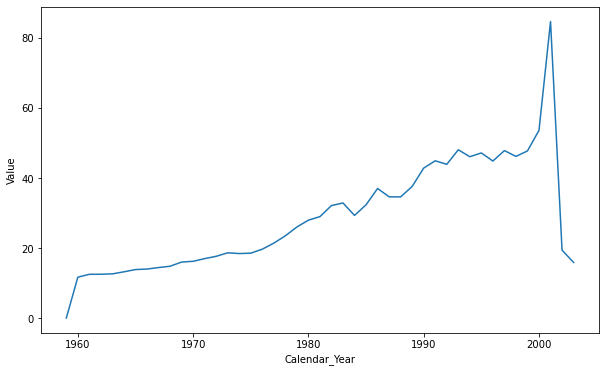

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Calendar_Year', y='Value');

In [180]:
data = pd.read_csv('../data/yearly_consumption_international.csv')
data.head()

,Unnamed: 0,Belgium,Luxembourg,Austria,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,...,Spain,Sweden,EU,Japan,Norway,Russia,Switzerland,Tunisia,UK,USA
0,1990,944.16,179.84,1340.0,102.0,1518.19,31.0,659.0,865.0,1518.19,...,2714.0,1689.0,1518.19,5060.0,727.0,NaN,907.0,101.0,2348.0,18298.0
1,1991,594.72,113.28,1302.0,17.0,1682.00,45.0,525.0,909.0,1682.00,...,2651.0,1604.0,1682.00,5809.0,758.0,NaN,949.0,90.0,2342.0,18661.0
2,1992,584.64,111.36,1212.0,175.0,135.00,39.0,472.0,959.0,13.00,...,3045.0,1634.0,1373.92,5132.0,736.0,1377.0,995.0,111.0,2516.0,18290.0
3,1993,662.76,126.24,1335.0,327.0,132.00,78.0,448.0,891.0,44.00,...,2728.0,1618.0,1398.52,5740.0,690.0,1795.0,869.0,101.0,2534.0,19217.0
4,1994,804.72,153.28,1086.0,353.0,164.00,45.0,509.0,908.0,63.00,...,2774.0,1669.0,1267.04,5973.0,800.0,1712.0,944.0,137.0,2640.0,17326.0


In [181]:
data.rename(columns={'Unnamed: 0' : 'date'}, inplace=True)

In [182]:
data = pd.melt(data, id_vars = ['date'], value_vars = data.columns[1:],
        var_name='country', value_name='consumption')

In [183]:
data['date'] = data['date'].astype(str)

In [184]:
data['date'] = pd.to_datetime(data['date'])

In [185]:
data.set_index('date', inplace=True)

In [186]:
data.index = pd.DatetimeIndex(data.index).year

In [187]:
dat = data.groupby(data.index)[['consumption']].sum()

In [188]:
dat['consumption'] = dat['consumption'] / 1000

In [245]:
df['Calendar_Year'] = df['Calendar_Year'].astype(str)

In [246]:
df['Calendar_Year'] = pd.to_datetime(df['Calendar_Year'])

In [247]:
df.set_index('Calendar_Year', inplace=True)

In [248]:
df.index = pd.DatetimeIndex(df.index).year

In [249]:
df.rename(columns={'Value' : 'consumption'}, inplace=True)

In [251]:
df = df[1:]

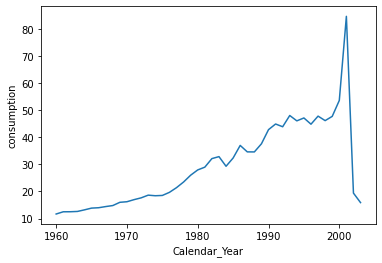

In [253]:
sns.lineplot(data=df, x=df.index, y='consumption');